<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering with Seeds Data

_Authors: Joseph Nelson (DC), Haley Boyan (DC), Sam Stack (DC)_

---

In [2]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

### 1. Import the data

In [3]:
seeds = pd.read_csv("../assets/datasets/seeds.csv")

In [5]:
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### 2. Do some EDA of relationships between features.

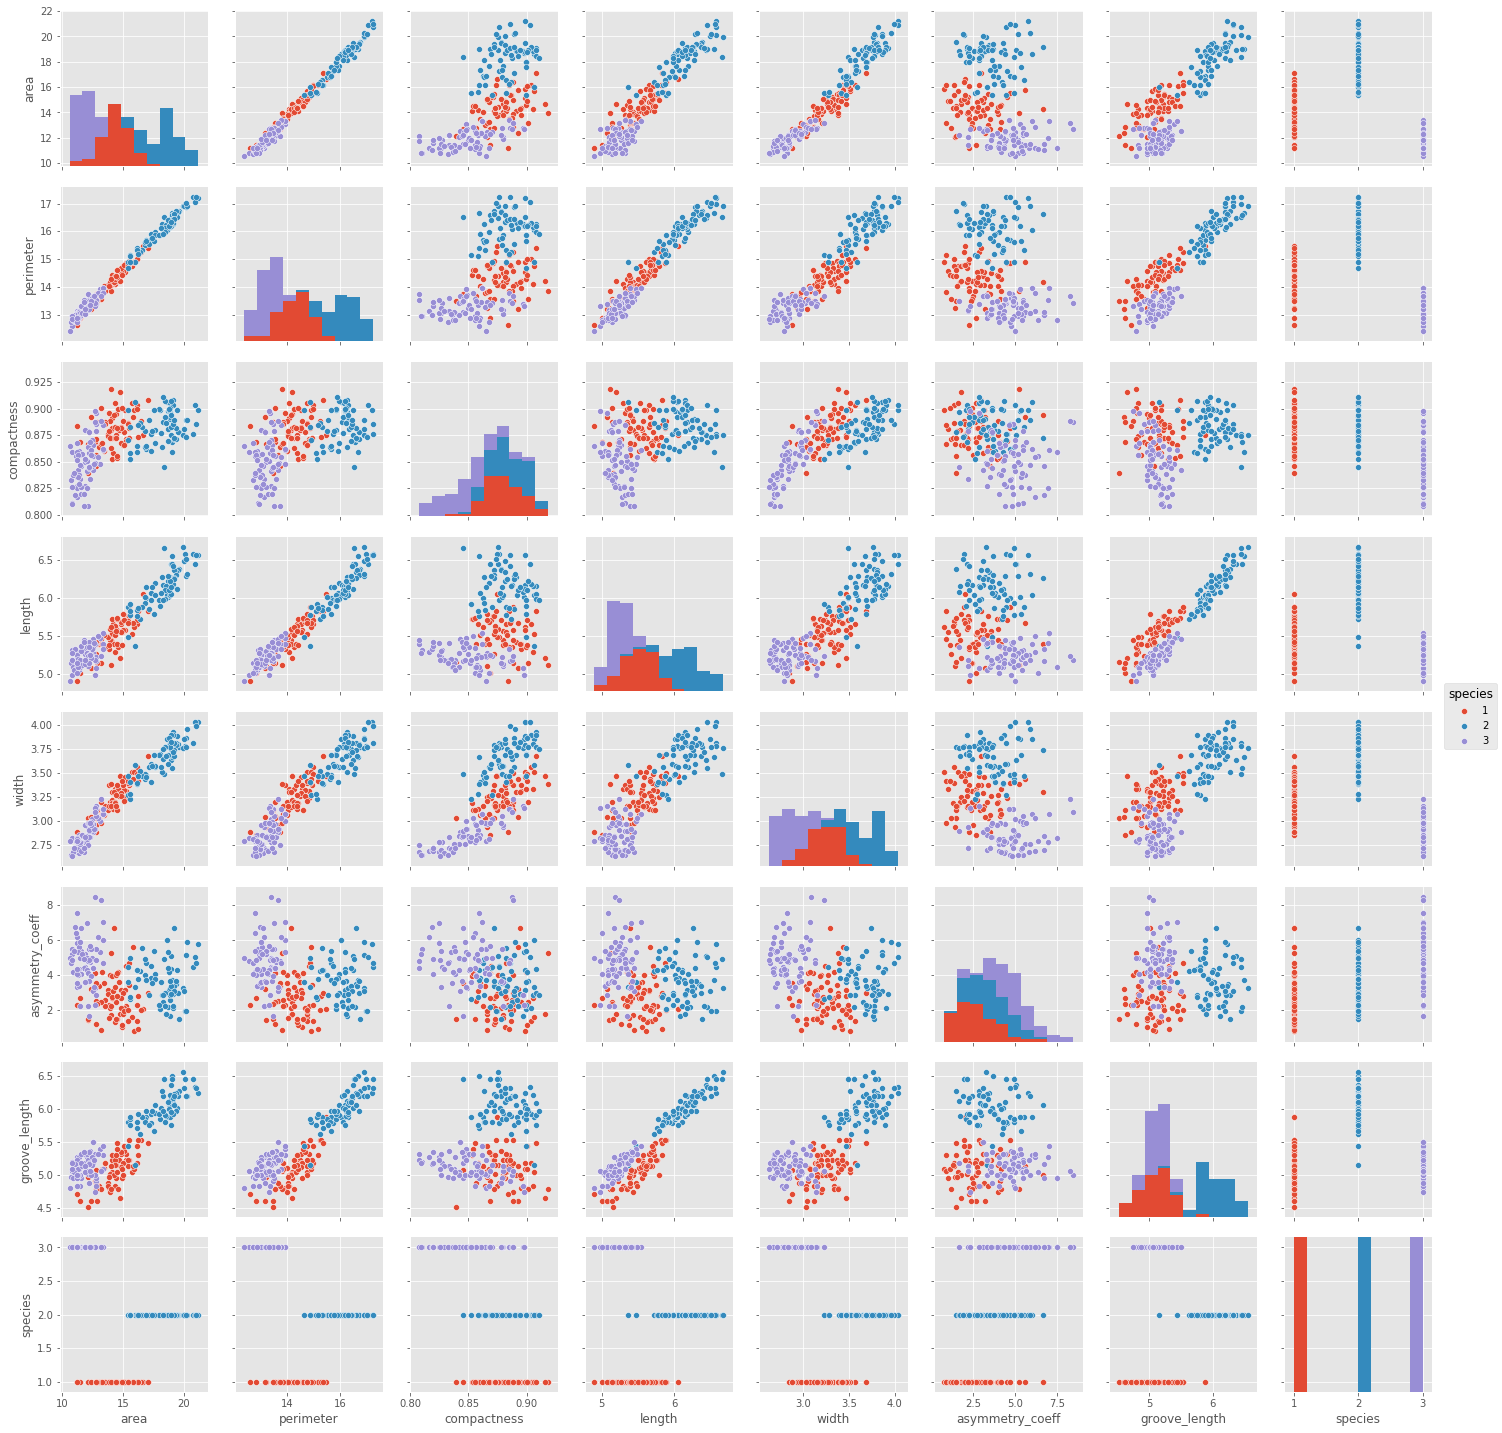

In [7]:
# Plot the Data to see the distributions/relationships
sns.pairplot(seeds, hue = 'species')

In [9]:
# Check for nulls
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
area               210 non-null float64
perimeter          210 non-null float64
compactness        210 non-null float64
length             210 non-null float64
width              210 non-null float64
asymmetry_coeff    210 non-null float64
groove_length      210 non-null float64
species            210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [16]:
# Check for nulls
seeds.describe()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [10]:
# Look at the real species labels.
list(seeds.columns)

['area',
 'perimeter',
 'compactness',
 'length',
 'width',
 'asymmetry_coeff',
 'groove_length',
 'species']

Remember, clustering is a unsupervised learning method so known classes will never be a thing.  In this situation we can see that the `perimiter` vs. `groove_length` is a good visualization to view the proper classes class, and we can use later to compare the results of clustering to a true value.

### 3. Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

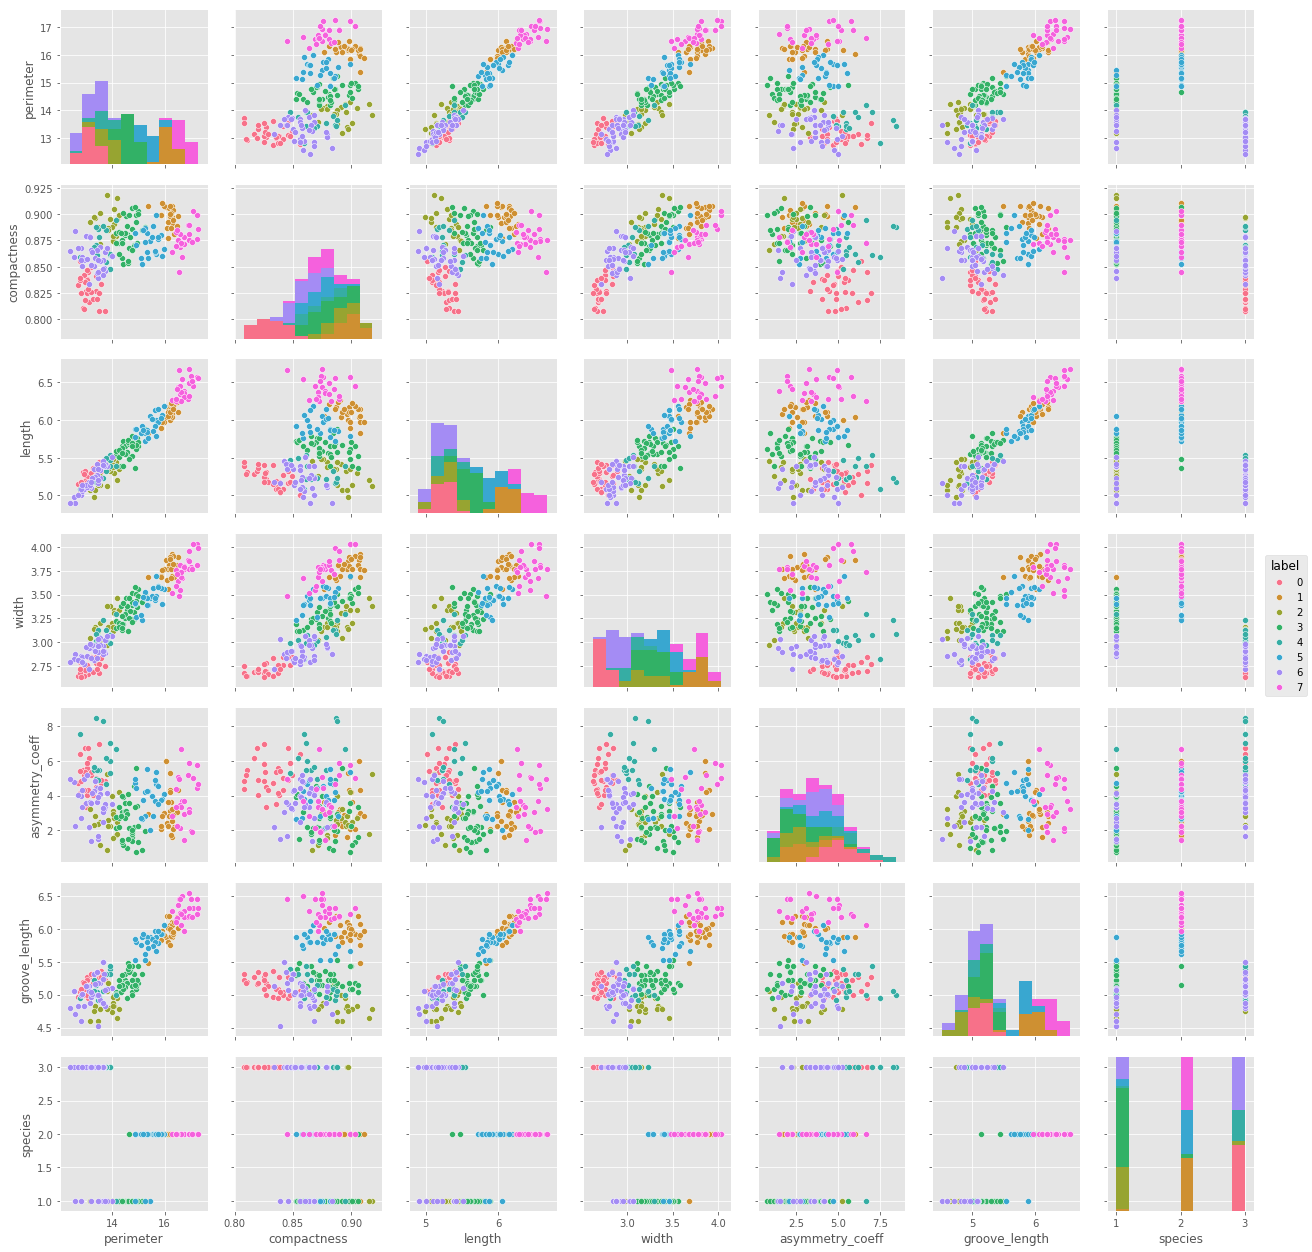

In [22]:
k = 8
X_scaled = preprocessing.MinMaxScaler().fit_transform(seeds.drop('species',axis=1))
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
seeds['label'] = labels
seeds.head()

cols = seeds.columns[1:-1]
sns.pairplot(seeds, x_vars=cols, y_vars= cols, hue='label');

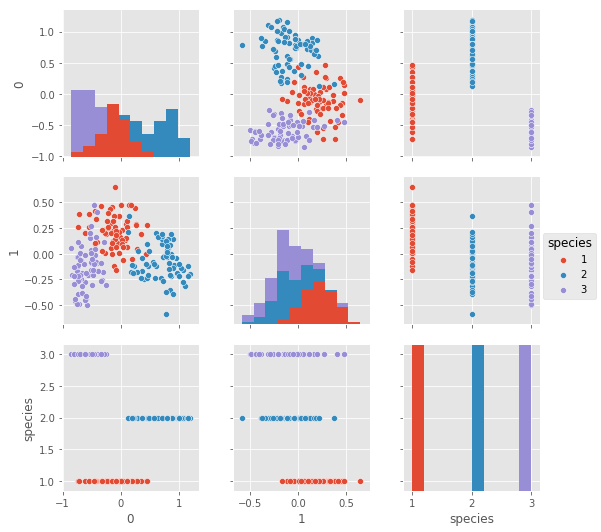

In [24]:
# this is the real data, with labels
from sklearn.decomposition import PCA
from sklearn import cluster, datasets, preprocessing, metrics
seeds = pd.read_csv("../assets/datasets/seeds.csv")
X = seeds.drop('species', axis=1)
X = preprocessing.MinMaxScaler().fit_transform(X)
pca = PCA(n_components=2)
X =  pca.fit_transform(X)
y = seeds.species
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)
#print(X_df.shape, y_df.shape)
new_seeds = pd.concat([X_df, y_df], axis=1)
sns.pairplot(new_seeds, hue='species')

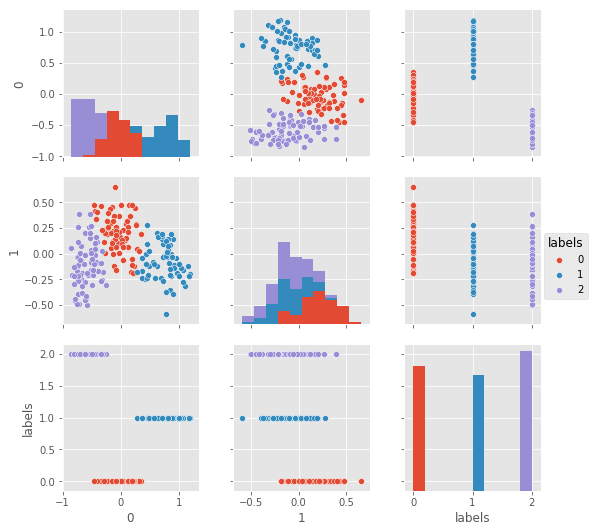

In [25]:
#this is clustered, or predicted
from sklearn.decomposition import PCA
from sklearn import cluster, datasets, preprocessing, metrics
seeds = pd.read_csv("../assets/datasets/seeds.csv")

X = seeds.drop('species', axis=1)
X = preprocessing.MinMaxScaler().fit_transform(X)
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X)

pca = PCA(n_components=2)
X = pca.fit_transform(X)

labels = kmeans.labels_
y = pd.DataFrame(labels, columns=['labels'])
# y['labels']=labels

new_seeds = pd.concat([pd.DataFrame(X), y], axis=1)
sns.pairplot(new_seeds, hue='labels')

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
- We know that there are 3 actual classes. However, in an actual situation in which we used clustering we would have no idea. Lets initally try using the default K for `KMeans`(8).

In [8]:
from sklearn.cluster import KMeans


### 5. Get the labels and centroids for out first clustering model.

In [9]:
# A:

### 6. Compute the silouette score and visually examine the results of the 8 clusters. 

_(pairplot with hue)_

In [10]:
from sklearn.metrics import silhouette_score

# A:

### 7. Repeat steps #4 and #6 with two selected or random K values and compare the results to the k=8 model.

In [11]:
import random

random.randint(1,25), random.randint(1,25)

(1, 10)

In [12]:
# A:

### 8. Build a function to find the optimal number of clusters using silhouette score as the criteria.
1. Function should accept a range and a dataframe as arguments
2. Returns the optimal K value, associate silhoutte and scaling method.
3. Your function should also consider the scaled results of the data. 
    - `normalize`, `StandardScaler`, `MinMaxScaler`


Once you have found the optimal K and version of the data, visualize the clusters.





In [13]:
# A: